## CAPSTONE PROJECT
### Using the dataset provided, create a binary classification.
Perform the following:
- perform an exploratory analysis
- split the data (train, validation, test)
- Perform 10-fold cross-validation and grid search (method of your choice)
- Compare the different classification methods (Logistic Regression, KNN, SVM, RF, XGBoost)
- Show evaluation metrics (ROC-AUC, accuracy, f-1 score)

In [27]:
#Importing necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns

# for resampling
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#for scaling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#for cross validation
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from numpy import mean

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from xgboost import XGBClassifier

# Radiomic dataset
data = pd.read_csv("C:/Users/Ivy/Desktop/data_scientist/SP901 Machine Learning/SP901_CS_completedata.csv")
data.index = data.index + 1
data.head()

,PatientID,Failure.binary,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
1,1,0,12.85352,46.256345,6.249117,17.825541,9.783773,6.814365,2.612479,0.688533,...,0.00690,6201.93480,4.13400,239.28938,0.97918,0.01899,0.95586,1145.10496,0.02586,6.28632
2,2,1,12.21115,27.454540,11.005214,26.469077,15.426640,12.932074,3.598298,0.789526,...,0.00423,16054.01263,8.37627,644.73702,0.95637,0.01461,0.93288,847.52537,0.04153,6.77853
3,3,0,12.75682,90.195696,2.777718,6.877486,4.295330,0.923425,0.962163,0.248637,...,0.00453,6674.63840,13.11686,1165.70261,0.97268,0.02501,0.91537,1923.85705,0.07104,7.15685
4,4,1,13.46730,325.643330,6.296588,22.029843,10.334779,6.649795,2.580759,0.832011,...,0.00888,17172.90951,23.84726,2760.41293,0.97203,0.01069,0.94658,1329.95290,0.03848,7.29521
5,5,0,12.63733,89.579042,3.583846,7.922501,4.454175,0.572094,0.757225,1.574845,...,0.00405,13231.94294,8.14437,784.59729,0.96469,0.02526,0.93769,1116.38669,0.05223,7.05149


In [3]:
#determining missing values
data.isnull().sum()

PatientID             0
Failure.binary        0
Entropy_cooc.W.ADC    0
GLNU_align.H.PET      0
Min_hist.PET          0
                     ..
GLNU_norm.W.ADC       0
ZSNU_norm.W.ADC       0
GLVAR_area.W.ADC      0
ZSVAR.W.ADC           0
Entropy_area.W.ADC    0
Length: 430, dtype: int64

In [4]:
#removing PatientID column
data=data.drop("PatientID", axis=1)
y = data["Failure.binary"]
X = data.drop("Failure.binary", axis=1)
X.head()

,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,Energy_hist.PET,...,LZLGE.W.ADC,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC
1,12.85352,46.256345,6.249117,17.825541,9.783773,6.814365,2.612479,0.688533,-0.339727,0.005095,...,0.00690,6201.93480,4.13400,239.28938,0.97918,0.01899,0.95586,1145.10496,0.02586,6.28632
2,12.21115,27.454540,11.005214,26.469077,15.426640,12.932074,3.598298,0.789526,-0.319613,0.006297,...,0.00423,16054.01263,8.37627,644.73702,0.95637,0.01461,0.93288,847.52537,0.04153,6.77853
3,12.75682,90.195696,2.777718,6.877486,4.295330,0.923425,0.962163,0.248637,-0.944246,0.005015,...,0.00453,6674.63840,13.11686,1165.70261,0.97268,0.02501,0.91537,1923.85705,0.07104,7.15685
4,13.46730,325.643330,6.296588,22.029843,10.334779,6.649795,2.580759,0.832011,0.855861,0.003289,...,0.00888,17172.90951,23.84726,2760.41293,0.97203,0.01069,0.94658,1329.95290,0.03848,7.29521
5,12.63733,89.579042,3.583846,7.922501,4.454175,0.572094,0.757225,1.574845,3.250288,0.008066,...,0.00405,13231.94294,8.14437,784.59729,0.96469,0.02526,0.93769,1116.38669,0.05223,7.05149


In [5]:
data["Failure.binary"].value_counts()
#Note. This is an unbalanced data. To minimize bias in calculation, validation and tests, it is necessary to perform resampling method.

# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

counter = Counter(y)
print(counter)
# Result shows that failure samples are almost half of the  samples obtained that does not provide failure for radiomic analysis.

Counter({0: 130, 1: 67})


In [6]:
# install imblearn and check version number
import imblearn
print(imblearn.__version__)

0.9.1


In [7]:
# define resampling
over = RandomOverSampler(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=1)

# define pipeline. In the following step, oversampling and undersampling method are combined.
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# fit and apply the pipeline
X_resampled, y_resampled = pipeline.fit_resample(X, y)

X_resampled.index = X_resampled.index + 1
y_resampled.index = y_resampled.index + 1

In [8]:
# Let's check our data distribution after resampling
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

counter = Counter(y_resampled)
print(counter)

Counter({0: 130, 1: 130})


In [9]:
# save to csv
X_resampled.to_csv("C:/Users/Ivy/Desktop/data_scientist/SP901 Machine Learning/X_resampled.csv",index = False)
y_resampled.to_csv("C:/Users/Ivy/Desktop/data_scientist/SP901 Machine Learning/y_resampled.csv",index = False)

data1 = pd.read_csv("C:/Users/Ivy/Desktop/data_scientist/SP901 Machine Learning/X_resampled.csv")
data2 = pd.read_csv("C:/Users/Ivy/Desktop/data_scientist/SP901 Machine Learning/y_resampled.csv")


In [10]:
# combine the resampled X and y
import pandas as pd
data_resampled = data1.join(data2)
data_resampled

,Entropy_cooc.W.ADC,GLNU_align.H.PET,Min_hist.PET,Max_hist.PET,Mean_hist.PET,Variance_hist.PET,Standard_Deviation_hist.PET,Skewness_hist.PET,Kurtosis_hist.PET,Energy_hist.PET,...,LZHGE.W.ADC,GLNU_area.W.ADC,ZSNU.W.ADC,ZSP.W.ADC,GLNU_norm.W.ADC,ZSNU_norm.W.ADC,GLVAR_area.W.ADC,ZSVAR.W.ADC,Entropy_area.W.ADC,Failure.binary
0,12.853520,46.256345,6.249117,17.825541,9.783773,6.814365,2.612479,0.688533,-0.339727,0.005095,...,6201.934800,4.134000,239.289380,0.979180,0.018990,0.955860,1145.104960,0.025860,6.286320,0
1,12.756820,90.195696,2.777718,6.877486,4.295330,0.923425,0.962163,0.248637,-0.944246,0.005015,...,6674.638400,13.116860,1165.702610,0.972680,0.025010,0.915370,1923.857050,0.071040,7.156850,0
2,12.637330,89.579042,3.583846,7.922501,4.454175,0.572094,0.757225,1.574845,3.250288,0.008066,...,13231.942940,8.144370,784.597290,0.964690,0.025260,0.937690,1116.386690,0.052230,7.051490,0
3,12.203410,36.798444,8.653594,28.223361,14.923360,17.700730,4.209453,0.839347,0.183203,0.004674,...,19242.694020,4.738700,440.806780,0.965650,0.012610,0.940410,1261.059970,0.052130,6.964380,0
4,12.275490,50.997414,5.711431,12.998990,7.733934,2.604651,1.615639,0.909312,0.065658,0.006540,...,16807.227790,10.340410,816.977500,0.961090,0.014290,0.931970,983.073750,0.057540,6.887560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,14.454471,101.743442,9.184214,22.642847,11.766441,4.803087,2.206487,1.586932,3.234333,0.021845,...,24476.501620,128.616939,17518.849080,0.987654,0.026201,0.959404,2058.451511,0.055420,7.674458,1
256,14.022440,107.019030,6.834160,20.226041,11.704523,7.456693,2.732761,0.297254,-0.508616,0.003434,...,17459.539670,51.199960,6499.474460,0.946760,0.009680,0.910020,1748.751110,0.137690,7.636490,1
257,13.802331,85.883713,9.235704,40.391254,16.366676,13.711458,5.244342,2.273872,3.029964,0.011860,...,27723.592420,78.512916,6502.107386,1.941032,0.024070,1.882184,2088.478456,0.090476,14.044318,1
258,12.851730,282.390247,5.273408,15.483223,8.262375,3.673790,1.907323,0.521611,-0.228196,-0.011596,...,15816.192160,8.513850,608.963020,0.947940,0.000240,0.911390,677.599630,0.029630,6.670610,1


In [11]:
y_resampled = data_resampled["Failure.binary"]
X_resampled = data_resampled.drop("Failure.binary", axis=1)
y_resampled

0      0
1      0
2      0
3      0
4      0
      ..
255    1
256    1
257    1
258    1
259    1
Name: Failure.binary, Length: 260, dtype: int64

Text(0, 0.5, 'PC2')

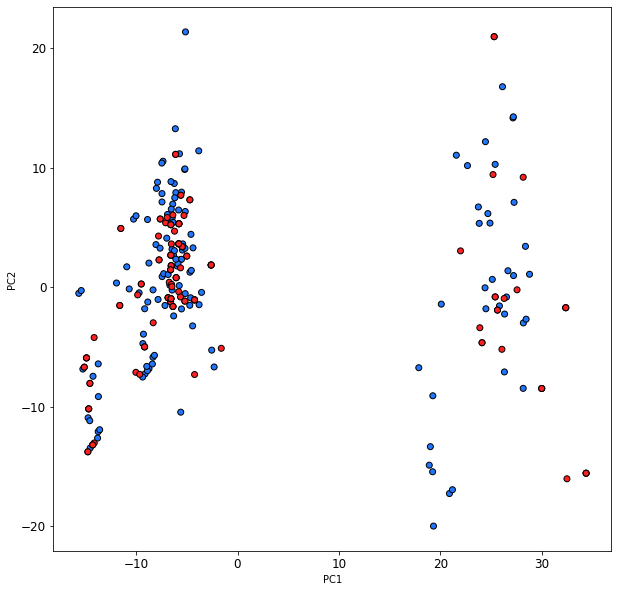

In [12]:
#Scale the data
scaler = StandardScaler()
scaler.fit(X_resampled)
scaled = scaler.transform(X_resampled)

#Obtain principal components
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y_resampled == 1 else '#2176ff' for y_resampled in data_resampled["Failure.binary"]]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')

plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Proportion of Variance Explained')

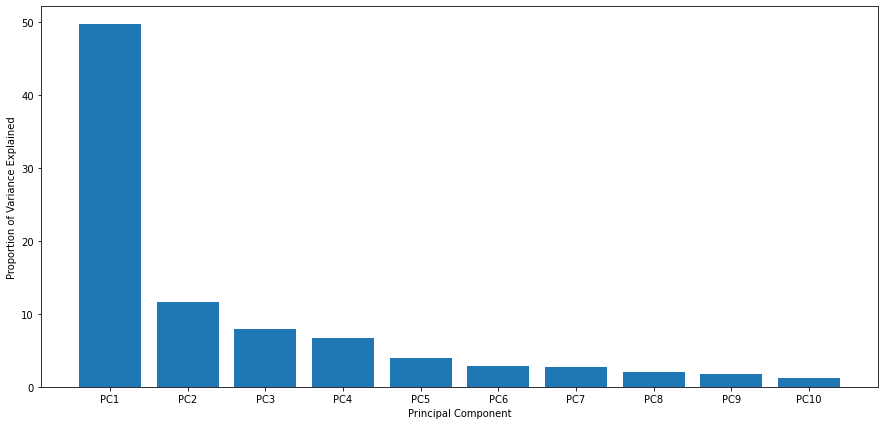

In [13]:
#Develop a scree plot
var = np.round(pca.explained_variance_ratio_[0:10]* 100, decimals =2) #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')

From the scree plot, PC1 to PC5 comprise ~80% of the variance. This means that we can reduce the number of variables to 5 while still retaining over 80% of the 'information' contained within the original data.

In [14]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_resampled, y_resampled, test_size=0.3)
print("X_Train: ", X_Train.shape)
print("X_Test: ", X_Test.shape)
print("Y_Train: ", Y_Train.shape)
print("Y_Test: ", Y_Test.shape)

X_Train:  (182, 428)
X_Test:  (78, 428)
Y_Train:  (182,)
Y_Test:  (78,)


In [15]:
# Applying cross validation
# Lets split the data into 10 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_resampled, y_resampled):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 234, Test set:26
Fold:2, Train set: 234, Test set:26
Fold:3, Train set: 234, Test set:26
Fold:4, Train set: 234, Test set:26
Fold:5, Train set: 234, Test set:26
Fold:6, Train set: 234, Test set:26
Fold:7, Train set: 234, Test set:26
Fold:8, Train set: 234, Test set:26
Fold:9, Train set: 234, Test set:26
Fold:10, Train set: 234, Test set:26


In [16]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 6, 9],
    'ccp_alpha': [0.01, 0.1],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [17]:
#make a GridSearchCV object
GS = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                 scoring=["r2","roc_auc"],
                 refit = "r2",
                 cv = 10,
                 verbose = 4)

In [18]:
GS.fit(X_Train, Y_Train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END bootstrap=True, ccp_alpha=0.01, max_depth=3, n_estimators=100; r2: (test=0.654) roc_auc: (test=0.955) total time=   2.9s
[CV 2/10] END bootstrap=True, ccp_alpha=0.01, max_depth=3, n_estimators=100; r2: (test=0.758) roc_auc: (test=0.989) total time=   2.7s
[CV 3/10] END bootstrap=True, ccp_alpha=0.01, max_depth=3, n_estimators=100; r2: (test=0.640) roc_auc: (test=0.963) total time=   2.9s
[CV 4/10] END bootstrap=True, ccp_alpha=0.01, max_depth=3, n_estimators=100; r2: (test=0.584) roc_auc: (test=0.985) total time=   3.0s
[CV 5/10] END bootstrap=True, ccp_alpha=0.01, max_depth=3, n_estimators=100; r2: (test=0.741) roc_auc: (test=0.919) total time=   3.0s
[CV 6/10] END bootstrap=True, ccp_alpha=0.01, max_depth=3, n_estimators=100; r2: (test=0.597) roc_auc: (test=0.883) total time=   2.7s
[CV 7/10] END bootstrap=True, ccp_alpha=0.01, max_depth=3, n_estimators=100; r2: (test=0.557) roc_auc: (test=0.985) total time=

[CV 2/10] END bootstrap=True, ccp_alpha=0.01, max_depth=9, n_estimators=100; r2: (test=0.775) roc_auc: (test=0.989) total time=   3.1s
[CV 3/10] END bootstrap=True, ccp_alpha=0.01, max_depth=9, n_estimators=100; r2: (test=0.609) roc_auc: (test=0.950) total time=   3.6s
[CV 4/10] END bootstrap=True, ccp_alpha=0.01, max_depth=9, n_estimators=100; r2: (test=0.513) roc_auc: (test=0.938) total time=   3.1s
[CV 5/10] END bootstrap=True, ccp_alpha=0.01, max_depth=9, n_estimators=100; r2: (test=0.747) roc_auc: (test=0.938) total time=   3.6s
[CV 6/10] END bootstrap=True, ccp_alpha=0.01, max_depth=9, n_estimators=100; r2: (test=0.583) roc_auc: (test=0.870) total time=   3.2s
[CV 7/10] END bootstrap=True, ccp_alpha=0.01, max_depth=9, n_estimators=100; r2: (test=0.520) roc_auc: (test=0.985) total time=   3.8s
[CV 8/10] END bootstrap=True, ccp_alpha=0.01, max_depth=9, n_estimators=100; r2: (test=0.191) roc_auc: (test=0.778) total time=   3.0s
[CV 9/10] END bootstrap=True, ccp_alpha=0.01, max_depth

[CV 3/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_estimators=100; r2: (test=0.492) roc_auc: (test=0.950) total time=   3.2s
[CV 4/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_estimators=100; r2: (test=0.511) roc_auc: (test=0.931) total time=   3.5s
[CV 5/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_estimators=100; r2: (test=0.764) roc_auc: (test=0.931) total time=   3.1s
[CV 6/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_estimators=100; r2: (test=0.624) roc_auc: (test=0.968) total time=   3.3s
[CV 7/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_estimators=100; r2: (test=0.534) roc_auc: (test=0.923) total time=   3.3s
[CV 8/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_estimators=100; r2: (test=0.291) roc_auc: (test=0.852) total time=   3.1s
[CV 9/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_estimators=100; r2: (test=0.592) roc_auc: (test=0.877) total time=   3.3s
[CV 10/10] END bootstrap=True, ccp_alpha=0.1, max_depth=6, n_e

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.01, 0.1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]},
             refit='r2', scoring=['r2', 'roc_auc'], verbose=4)

In [19]:
print(GS.best_estimator_)  #to get the complete details of the best model

RandomForestRegressor(ccp_alpha=0.01, max_depth=3)


In [20]:
print(GS.best_params_) # score according to the metric we passed in refit

{'bootstrap': True, 'ccp_alpha': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [21]:
data_GS = pd.DataFrame(GS.cv_results_)
data_GS = data_GS.sort_values("rank_test_r2")
data_GS.to_csv("C:/Users/Ivy/Desktop/data_scientist/SP901 Machine Learning/data_GS.csv")

In [22]:
data_GS.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_ccp_alpha,param_max_depth,param_n_estimators,params,split0_test_r2,...,split3_test_roc_auc,split4_test_roc_auc,split5_test_roc_auc,split6_test_roc_auc,split7_test_roc_auc,split8_test_roc_auc,split9_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,2.956107,0.089209,0.048836,0.010156,True,0.01,3,100,"{'bootstrap': True, 'ccp_alpha': 0.01, 'max_de...",0.654221,...,0.984615,0.91875,0.883117,0.984615,0.777778,0.888889,0.9250,0.926870,0.061811,12
4,6.994784,0.440826,0.056720,0.011285,True,0.01,6,200,"{'bootstrap': True, 'ccp_alpha': 0.01, 'max_de...",0.673092,...,0.969231,0.90000,0.857143,0.984615,0.777778,0.901235,0.9500,0.925730,0.063844,13
2,8.247569,0.374619,0.082890,0.009068,True,0.01,3,300,"{'bootstrap': True, 'ccp_alpha': 0.01, 'max_de...",0.678604,...,0.953846,0.89375,0.857143,1.000000,0.765432,0.901235,0.9375,0.922646,0.067149,16
7,6.916622,0.260521,0.053386,0.006314,True,0.01,9,200,"{'bootstrap': True, 'ccp_alpha': 0.01, 'max_de...",0.656487,...,0.953846,0.87500,0.844156,1.000000,0.765432,0.901235,0.9375,0.918310,0.068985,17
3,3.577016,0.203502,0.040682,0.006363,True,0.01,6,100,"{'bootstrap': True, 'ccp_alpha': 0.01, 'max_de...",0.654496,...,0.969231,0.89375,0.844156,1.000000,0.777778,0.888889,0.9500,0.925221,0.068849,14


The accuracy of the Random Forest Model is 0.8974358974358975
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.89      0.89      0.89        37

    accuracy                           0.90        78
   macro avg       0.90      0.90      0.90        78
weighted avg       0.90      0.90      0.90        78

Scores for each fold are: [0.93125    1.         0.98181818 0.98214286 0.90625    0.91666667
 0.89285714 0.90532544 0.9875     0.95833333]
Mean ROC AUC: 0.946
Training accuracy : 1.0
Testing accuracy : 0.8974358974358975


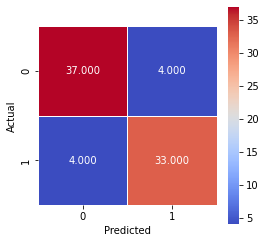

In [23]:
# applying best parameters for Random Forest Classifier
randomforest = RandomForestClassifier(max_depth=6, n_estimators=200)
randomforest.fit(X_Train, Y_Train)

y_pred = randomforest.predict(X_Test)
score_randomforest = accuracy_score(Y_Test,y_pred)
print('The accuracy of the Random Forest Model is', score_randomforest)
print(classification_report(Y_Test, y_pred))

score = cross_val_score(randomforest, X_resampled, y_resampled, cv= kf, scoring="roc_auc")
print(f'Scores for each fold are: {score}')
print('Mean ROC AUC: %.3f' % mean(score))
print("Training accuracy :", randomforest.score(X_Train, Y_Train))
print("Testing accuracy :", randomforest.score(X_Test, Y_Test))

# confusion matrix 
cm = confusion_matrix(Y_Test, y_pred)

# Representing the confusion matrix in a heat map

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='coolwarm');
plt.ylabel('Actual')
plt.xlabel('Predicted');

C:\Users\Ivy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ivy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

The accuracy of the Logistic Regression is 0.7307692307692307
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        41
           1       0.71      0.73      0.72        37

    accuracy                           0.73        78
   macro avg       0.73      0.73      0.73        78
weighted avg       0.73      0.73      0.73        78



C:\Users\Ivy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ivy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

Scores for each cross validation 10-fold are: [0.7        0.77380952 0.78181818 0.80357143 0.80625    0.81547619
 0.79166667 0.72189349 0.84375    0.91071429]
Mean ROC AUC: 0.795
Training accuracy : 0.7032967032967034
Testing accuracy : 0.7307692307692307


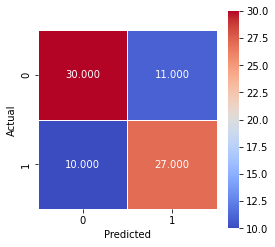

In [24]:
# Classification using Logistic Regression
from sklearn.metrics import classification_report,accuracy_score
logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)
y_pred = logreg.predict(X_Test)
score_logreg = accuracy_score(Y_Test,y_pred)
print('The accuracy of the Logistic Regression is', score_logreg)

print(classification_report(Y_Test, y_pred))


score = cross_val_score(linear_model.LogisticRegression(), X_resampled, y_resampled, cv= kf, scoring="roc_auc")
print(f'Scores for each cross validation 10-fold are: {score}')
print('Mean ROC AUC: %.3f' % mean(score))

print("Training accuracy :", logreg.score(X_Train, Y_Train))
print("Testing accuracy :", logreg.score(X_Test, Y_Test))

# confusion matrix 
cm = confusion_matrix(Y_Test, y_pred)

# Representing the confusion matrix in a heat map

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='coolwarm');
plt.ylabel('Actual')
plt.xlabel('Predicted');

The accuracy of the KNN Model is 0.6410256410256411
              precision    recall  f1-score   support

           0       0.68      0.61      0.64        41
           1       0.61      0.68      0.64        37

    accuracy                           0.64        78
   macro avg       0.64      0.64      0.64        78
weighted avg       0.64      0.64      0.64        78

Scores for each cross validation 10-fold are: [0.68125    0.8452381  0.77878788 0.78869048 0.5625     0.70833333
 0.76190476 0.64792899 0.778125   0.79166667]
Mean ROC AUC: 0.734
Training accuracy : 0.7802197802197802
Testing accuracy : 0.6410256410256411


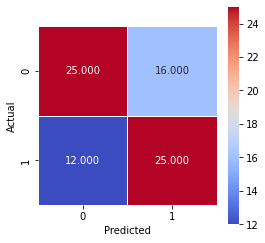

In [25]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_Train, Y_Train)
y_pred = knn.predict(X_Test)
score_knn = accuracy_score(Y_Test,y_pred)
print('The accuracy of the KNN Model is',score_knn)
print(classification_report(Y_Test, y_pred))

score = cross_val_score(knn, X_resampled, y_resampled, cv=kf, scoring="roc_auc")
print(f'Scores for each cross validation 10-fold are: {score}')
print('Mean ROC AUC: %.3f' % mean(score))
print("Training accuracy :", knn.score(X_Train, Y_Train))
print("Testing accuracy :", knn.score(X_Test, Y_Test))

# confusion matrix 
cm = confusion_matrix(Y_Test, y_pred)

# Representing the confusion matrix in a heat map

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='coolwarm');
plt.ylabel('Actual')
plt.xlabel('Predicted');

The accuracy of the XGBoost Model is 0.9487179487179487
Scores for each cross validation 10-fold are: [0.9375     1.         1.         1.         0.86875    0.92857143
 0.95833333 1.         1.         0.97619048]
Mean ROC AUC: 0.967
Training accuracy : 1.0
Testing accuracy : 0.9487179487179487


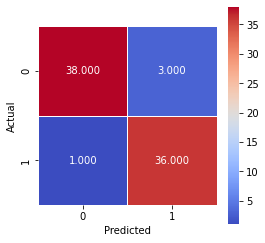

In [28]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_Train, Y_Train, verbose=False)
y_pred = xgb.predict(X_Test)
score_xgb = accuracy_score(Y_Test,y_pred)
print('The accuracy of the XGBoost Model is',score_xgb)

score = cross_val_score(xgb, X_resampled, y_resampled, cv= kf, scoring="roc_auc")
print(f'Scores for each cross validation 10-fold are: {score}')
print('Mean ROC AUC: %.3f' % mean(score))
print("Training accuracy :", xgb.score(X_Train, Y_Train))
print("Testing accuracy :", xgb.score(X_Test, Y_Test))

# confusion matrix 
cm = confusion_matrix(Y_Test, y_pred)

# Representing the confusion matrix in a heat map

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='coolwarm');
plt.ylabel('Actual')
plt.xlabel('Predicted');

It is evident that the accuracy for XGBoost Classifier is the highest among the models used here. Even though I applied grid search to tune parameters for Random Forest, XGBoost classifier exhibits a higher model accuracy. To improve model accuracy, I am also applying Grid Search for XGB Boost.

In [29]:
#Parameter tuning on XGBoost
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100,200,500],
    'max_depth': [3, 6, 9],
    'gamma': [0.01, 0.1],
    'learning_rate': [0.001, .01, 1]
}
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
#make a GridSearchCV object for XGBClassifier model
GS = GridSearchCV(estimator=xgb,
                  param_grid=param_grid,
                 scoring=["r2","roc_auc"],
                 refit = "r2",
                 cv = 10,
                 verbose = 4)

In [31]:
GS.fit(X_Train, Y_Train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 1/10] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; r2: (test=-0.056) roc_auc: (test=0.911) total time=   2.4s
[CV 2/10] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; r2: (test=0.367) roc_auc: (test=1.000) total time=   2.1s
[CV 3/10] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.877) total time=   1.9s
[CV 4/10] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; r2: (test=0.333) roc_auc: (test=0.920) total time=   1.7s
[CV 5/10] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.926) total time=   1.6s
[CV 6/10] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.907) total time=   1.8s
[CV 7/10] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.901) tot

[CV 1/10] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=100; r2: (test=-0.056) roc_auc: (test=0.933) total time=   1.8s
[CV 2/10] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=100; r2: (test=0.156) roc_auc: (test=0.967) total time=   1.9s
[CV 3/10] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.870) total time=   1.7s
[CV 4/10] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=100; r2: (test=0.333) roc_auc: (test=0.914) total time=   1.7s
[CV 5/10] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.926) total time=   1.8s
[CV 6/10] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.877) total time=   2.4s
[CV 7/10] END gamma=0.01, learning_rate=0.001, max_depth=9, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.889) total time=   2.3s
[CV 8/10] END gamma=0.01, learning_rate=0.001, 

[CV 2/10] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators=100; r2: (test=1.000) roc_auc: (test=1.000) total time=   2.4s
[CV 3/10] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators=100; r2: (test=0.333) roc_auc: (test=0.889) total time=   2.5s
[CV 4/10] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators=100; r2: (test=0.333) roc_auc: (test=0.889) total time=   2.6s
[CV 5/10] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators=100; r2: (test=0.778) roc_auc: (test=0.920) total time=   1.9s
[CV 6/10] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.864) total time=   1.9s
[CV 7/10] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.988) total time=   1.8s
[CV 8/10] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators=100; r2: (test=-0.111) roc_auc: (test=0.827) total time=   1.9s
[CV 9/10] END gamma=0.01, learning_rate=0.01, max_dept

[CV 3/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r2: (test=0.333) roc_auc: (test=0.963) total time=   0.7s
[CV 4/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r2: (test=0.778) roc_auc: (test=0.988) total time=   0.6s
[CV 5/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r2: (test=0.778) roc_auc: (test=0.889) total time=   0.7s
[CV 6/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r2: (test=0.778) roc_auc: (test=0.938) total time=   0.7s
[CV 7/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r2: (test=0.333) roc_auc: (test=0.988) total time=   0.8s
[CV 8/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.877) total time=   0.7s
[CV 9/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.901) total time=   0.6s
[CV 10/10] END gamma=0.01, learning_rate=1, max_depth=3, n_estimators=100; r

[CV 6/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; r2: (test=0.778) roc_auc: (test=1.000) total time=   0.6s
[CV 7/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; r2: (test=0.333) roc_auc: (test=0.975) total time=   0.6s
[CV 8/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; r2: (test=0.111) roc_auc: (test=0.889) total time=   0.6s
[CV 9/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.901) total time=   0.6s
[CV 10/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; r2: (test=0.550) roc_auc: (test=1.000) total time=   0.6s
[CV 1/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=200; r2: (test=0.789) roc_auc: (test=1.000) total time=   1.3s
[CV 2/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=200; r2: (test=0.789) roc_auc: (test=1.000) total time=   1.3s
[CV 3/10] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=200; r

[CV 8/10] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=100; r2: (test=-0.111) roc_auc: (test=0.685) total time=   1.9s
[CV 9/10] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.864) total time=   1.8s
[CV 10/10] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=100; r2: (test=0.550) roc_auc: (test=1.000) total time=   2.3s
[CV 1/10] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=200; r2: (test=-0.056) roc_auc: (test=0.933) total time=   5.0s
[CV 2/10] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=200; r2: (test=0.789) roc_auc: (test=1.000) total time=   3.7s
[CV 3/10] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=200; r2: (test=0.111) roc_auc: (test=0.870) total time=   3.3s
[CV 4/10] END gamma=0.1, learning_rate=0.001, max_depth=6, n_estimators=200; r2: (test=0.333) roc_auc: (test=0.914) total time=   4.8s
[CV 5/10] END gamma=0.1, learning_rate=0.001, max_de

[CV 9/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; r2: (test=0.556) roc_auc: (test=0.895) total time=   1.4s
[CV 10/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=100; r2: (test=0.775) roc_auc: (test=0.975) total time=   1.5s
[CV 1/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; r2: (test=0.578) roc_auc: (test=0.956) total time=   3.2s
[CV 2/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; r2: (test=0.789) roc_auc: (test=1.000) total time=   3.5s
[CV 3/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; r2: (test=0.111) roc_auc: (test=0.951) total time=   3.2s
[CV 4/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; r2: (test=0.556) roc_auc: (test=0.975) total time=   2.8s
[CV 5/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200; r2: (test=0.556) roc_auc: (test=0.914) total time=   2.8s
[CV 6/10] END gamma=0.1, learning_rate=0.01, max_depth=3, n_e

[CV 1/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; r2: (test=0.578) roc_auc: (test=0.967) total time=   4.1s
[CV 2/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; r2: (test=0.789) roc_auc: (test=1.000) total time=   4.0s
[CV 3/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; r2: (test=0.111) roc_auc: (test=0.951) total time=   3.7s
[CV 4/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; r2: (test=0.111) roc_auc: (test=0.963) total time=   4.4s
[CV 5/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; r2: (test=0.556) roc_auc: (test=0.914) total time=   3.8s
[CV 6/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; r2: (test=0.556) roc_auc: (test=1.000) total time=   3.5s
[CV 7/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=200; r2: (test=0.556) roc_auc: (test=1.000) total time=   3.5s
[CV 8/10] END gamma=0.1, learning_rate=0.01, max_depth=9, n_es

[CV 4/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; r2: (test=0.333) roc_auc: (test=0.938) total time=   1.6s
[CV 5/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; r2: (test=0.556) roc_auc: (test=0.914) total time=   1.4s
[CV 6/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; r2: (test=0.778) roc_auc: (test=1.000) total time=   1.5s
[CV 7/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; r2: (test=0.778) roc_auc: (test=0.963) total time=   1.4s
[CV 8/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; r2: (test=0.111) roc_auc: (test=0.901) total time=   1.3s
[CV 9/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; r2: (test=0.556) roc_auc: (test=0.901) total time=   1.3s
[CV 10/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; r2: (test=0.550) roc_auc: (test=0.988) total time=   1.6s
[CV 1/10] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=500; r2: (test

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [32]:
print(GS.best_estimator_)  #to get the complete details of the best model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


The accuracy of the XGBoost Model is 0.9487179487179487
Scores for each cross validation 10-fold are: [0.94375    1.         0.98787879 0.99404762 0.86875    0.92261905
 0.9702381  0.99408284 1.         0.97619048]
Mean ROC AUC: 0.966
Training accuracy : 1.0
Testing accuracy : 0.9487179487179487


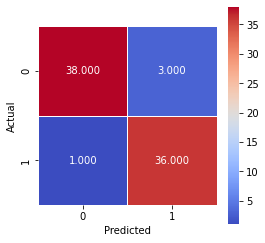

In [35]:
#Applying best parameters for XGBoost Classifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.01, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)
xgb.fit(X_Train, Y_Train, verbose=False)
y_pred = xgb.predict(X_Test)
score_xgb = accuracy_score(Y_Test,y_pred)
print('The accuracy of the XGBoost Model is',score_xgb)

score = cross_val_score(xgb, X_resampled, y_resampled, cv= kf, scoring="roc_auc")
print(f'Scores for each cross validation 10-fold are: {score}')
print('Mean ROC AUC: %.3f' % mean(score))
print("Training accuracy :", xgb.score(X_Train, Y_Train))
print("Testing accuracy :", xgb.score(X_Test, Y_Test))

# confusion matrix 
cm = confusion_matrix(Y_Test, y_pred)

# Representing the confusion matrix in a heat map

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='coolwarm');
plt.ylabel('Actual')
plt.xlabel('Predicted');

The result is almost the same with the one with unspecified parameters. However,XGBoost Classifier is still the best model to use in this case.